# Explore here

In [134]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Machine learning -----------------------------------------------------
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# Preprocessing --------------------------------------------------
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
# Metrics --------------------------------------------------------------
from sklearn.metrics import mean_squared_error, r2_score

In [135]:
#Load Data and perform a quick check
df_raw = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv')

df_raw.to_csv('../data/raw/data_raw.csv')

In [136]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [137]:
df_raw.sample(10)


,age,sex,bmi,children,smoker,region,charges
643,23,female,34.960,3,no,northwest,4466.62140
406,33,female,24.310,0,no,southeast,4185.09790
165,47,male,28.215,4,no,northeast,10407.08585
500,29,male,34.400,0,yes,southwest,36197.69900
433,60,female,30.500,0,no,southwest,12638.19500
651,53,female,39.600,1,no,southeast,10579.71100
160,42,female,26.600,0,yes,northwest,21348.70600
880,22,male,34.800,3,no,southwest,3443.06400
1127,35,female,35.860,2,no,southeast,5836.52040
1164,41,female,28.310,1,no,northwest,7153.55390


In [138]:
#Time to process the Data
df_processed = df_raw.copy()

In [139]:
df_processed['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [140]:
df_processed['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [141]:
df_processed['sex'] = df_processed['sex'].apply(lambda x: 1 if x == 'male' else 0)
df_processed['smoker'] = df_processed['smoker'].apply(lambda x: 1 if x == 'yes' else 0)

In [142]:
df_processed['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [143]:
df_processed['region'] = pd.Categorical(df_raw['region'])

df_processed.to_csv('../data/processed/data_processed.csv')

df = df_processed.copy()

In [144]:
#EDA

X = df.copy().drop(['charges'],axis=1)

y = df['charges'].copy()

# 3.1. Create Train and Test subsets

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1400, test_size=0.2) #Stratify: stratificar entre yes y no de specialty

df_train = pd.concat([X_train, y_train], axis=1)

In [145]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1070 entries, 796 to 1099
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1070 non-null   int64   
 1   sex       1070 non-null   int64   
 2   bmi       1070 non-null   float64 
 3   children  1070 non-null   int64   
 4   smoker    1070 non-null   int64   
 5   region    1070 non-null   category
 6   charges   1070 non-null   float64 
dtypes: category(1), float64(2), int64(4)
memory usage: 59.8 KB


In [146]:
df_train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,1070.0,NaN,NaN,NaN,38.933645,14.010162,18.0,26.0,39.0,51.0,64.0
sex,1070.0,NaN,NaN,NaN,0.490654,0.500146,0.0,0.0,0.0,1.0,1.0
bmi,1070.0,NaN,NaN,NaN,30.524486,6.086172,15.96,26.185,30.25,34.43,53.13
children,1070.0,NaN,NaN,NaN,1.090654,1.206548,0.0,0.0,1.0,2.0,5.0
smoker,1070.0,NaN,NaN,NaN,0.201869,0.401583,0.0,0.0,0.0,0.0,1.0
region,1070,4,southeast,297,NaN,NaN,NaN,NaN,NaN,NaN,NaN
charges,1070.0,NaN,NaN,NaN,13119.297215,12010.918337,1131.5066,4726.388412,9208.12055,16281.59625,63770.42801


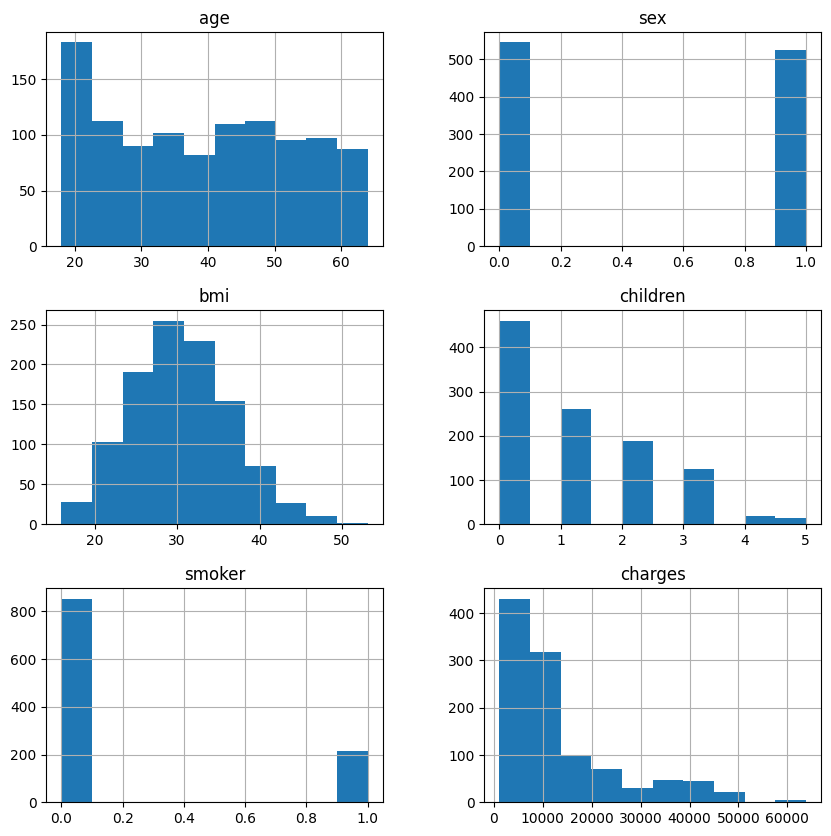

In [147]:
df_train.hist(figsize=(10,10))
plt.show()

/home/arnaldoch/Documents/Bootcamp_Data_Science/Tareas/linear-regression-project/.env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/arnaldoch/Documents/Bootcamp_Data_Science/Tareas/linear-regression-project/.env/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


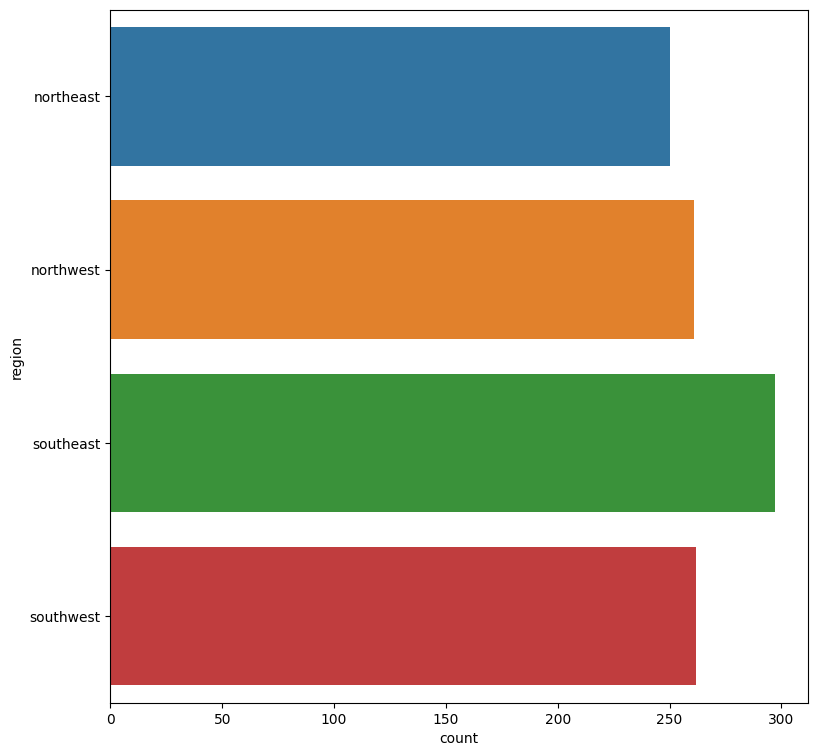

In [148]:
#Analisis univariado de variables categoricas

fig,ax = plt.subplots(1, 1, figsize = (9,9))

sns.countplot(data=df_train, y='region')

plt.show()

In [149]:
#Se evalua la correlacion. Es notable que smoker es una variable independiente muy correlacionada a la variable dependiente.
df_train.select_dtypes('number').corr().style.background_gradient(cmap='Blues')

#No se visualiza una correlacion importante entre las variables independientes. Por lo que puede usarse el Linear Regression.

,age,sex,bmi,children,smoker,charges
age,1.000000,-0.026321,0.112425,0.072795,-0.022224,0.290919
sex,-0.026321,1.000000,0.034325,0.019232,0.088579,0.055033
bmi,0.112425,0.034325,1.000000,0.021079,0.009175,0.203217
children,0.072795,0.019232,0.021079,1.000000,0.006600,0.079981
smoker,-0.022224,0.088579,0.009175,0.006600,1.000000,0.783597
charges,0.290919,0.055033,0.203217,0.079981,0.783597,1.000000


In [150]:
# 4. Creacion del Modelo: Model Training and Prediction

cat_cols = X_train.select_dtypes('category').columns #cat_cols variables categoricas
num_cols = X_train.select_dtypes('number').columns   # num_cols variables numericas

# 4.1. Create Pipeline

cat_transformer = Pipeline(steps=[
    ('onehot',OneHotEncoder(sparse=False)) #sparse son varias columnas, con false las comprime 
])
#onehot convierte las variables categoricas a numeros.
num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())    # escala los datos a una media de cero y un rango unitario (desviación)
])
#StandardScaler se usa este escaler porque las variables son casi simetricas.

preprocessor = ColumnTransformer(transformers=[
    ('cat', cat_transformer, cat_cols),
    ('num', num_transformer, num_cols)
])


In [151]:
#The Casifier is added to the pipeline
linear_regression_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

In [152]:
#Model is fit to the Train Data
linear_regression_model.fit(X_train,y_train)

/home/arnaldoch/Documents/Bootcamp_Data_Science/Tareas/linear-regression-project/.env/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(sparse=False))]),
                                                  Index(['region'], dtype='object')),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'sex', 'bmi', 'children', 'smoker'], dtype='object'))])),
                ('model', LinearRegression())])

In [153]:
print(f"Intercept (a): {linear_regression_model['model'].intercept_}")
print(f"Coefficients (b): {linear_regression_model['model'].coef_}")

Intercept (a): 13147.020362914045
Coefficients (b): [ 849.11017677   58.1249318  -554.75204274 -352.48306582 3413.40904912
 -159.56487269 2075.35476857  599.62794675 9478.28840382]


In [154]:
y_hat = linear_regression_model.predict(X_test)
y_hat

array([12653.73312229, 29723.93421542, 28038.31262482,  6710.19759019,
        5890.23886148, 10653.86388124, 29524.23027599, 39182.52215118,
        8582.08379565,  4808.11663339,  2236.43307411,  7445.98165341,
       14283.41190786,  3873.34535863,  8135.91963754, 12724.95570263,
       14084.84923544,  8873.35536985,  9154.95239047, 14652.70845457,
       11298.64079866,  7351.39211598, 13673.18395369,  5638.59032183,
       16940.76686024,   940.04583124, 11903.63241443, 28108.50842935,
       38760.02685365, 13774.35629391, 38580.52092334, 16224.21367895,
       13001.17352305, 34632.96920505, 27832.39258892,  7873.00968595,
       10481.40293185, 38687.66988337,  8864.53236538, 10903.80502558,
       30867.48952935, 13891.54365635, 11956.54044283,  2849.0240667 ,
        1883.616428  , 11072.74791099,  7279.02129035, 12900.04691376,
        3347.59319217, 12639.23181871,  8783.64933217,  9757.29856746,
       11772.06695981,  5638.12269603, 10709.62446126,  4862.27260366,
      

In [155]:
print(f"Mean squared error: {mean_squared_error(y_test, y_hat):.4f}")
print(f"Coefficient of determination: {r2_score(y_test, y_hat):.4f}")

Mean squared error: 33076558.8607
Coefficient of determination: 0.7876


In [110]:
#It is noticed that the R2 increses on 4% when including the Categorical Variable "Region" 
#to the Model preprocesing pipeline.